In [1]:
# the numpy numerical module
import numpy as np
# the matplotlib plotting module
import matplotlib.pyplot as plt

## Randomness

In [15]:
# random numbers from  numpy
randgen = np.random.default_rng() # define the generator (new in numpy 1.21!)
r = randgen.random(1000) # generate the random numbers

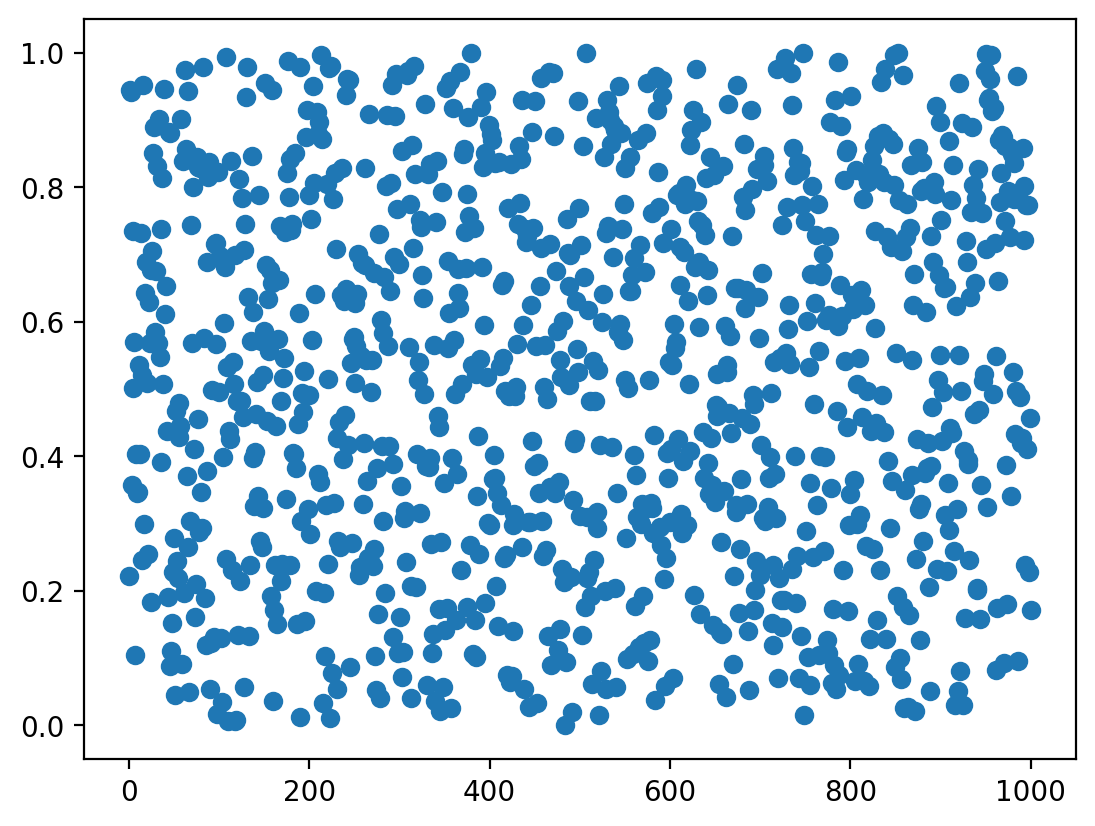

In [17]:
plt.scatter(np.linspace(0,1000,1000),r)

## Random sequences of notes

In [7]:
# import modules for composing
from musicntwrk.comptools.displayNotes import displayNotes
from musicntwrk.comptools.music import Rest,Note,NoteSeq

In [19]:
# function that produces a NoteSeq sequence
def random_notes(pitch_list, octave_list, duration,
                 number_of_notes, volume=[120]):
    result = NoteSeq()
    for x in range(0, number_of_notes):
        pitch = np.random.choice(pitch_list)
        octave = np.random.choice(octave_list)
        dur = np.random.choice(duration)
        vol = np.random.choice(volume)
        result.append(Note(pitch, octave, dur, vol))
    return(result)

In [21]:
r = random_notes(range(0, 12), range(5, 7), [1/4, 1/8, 1/2], 50)

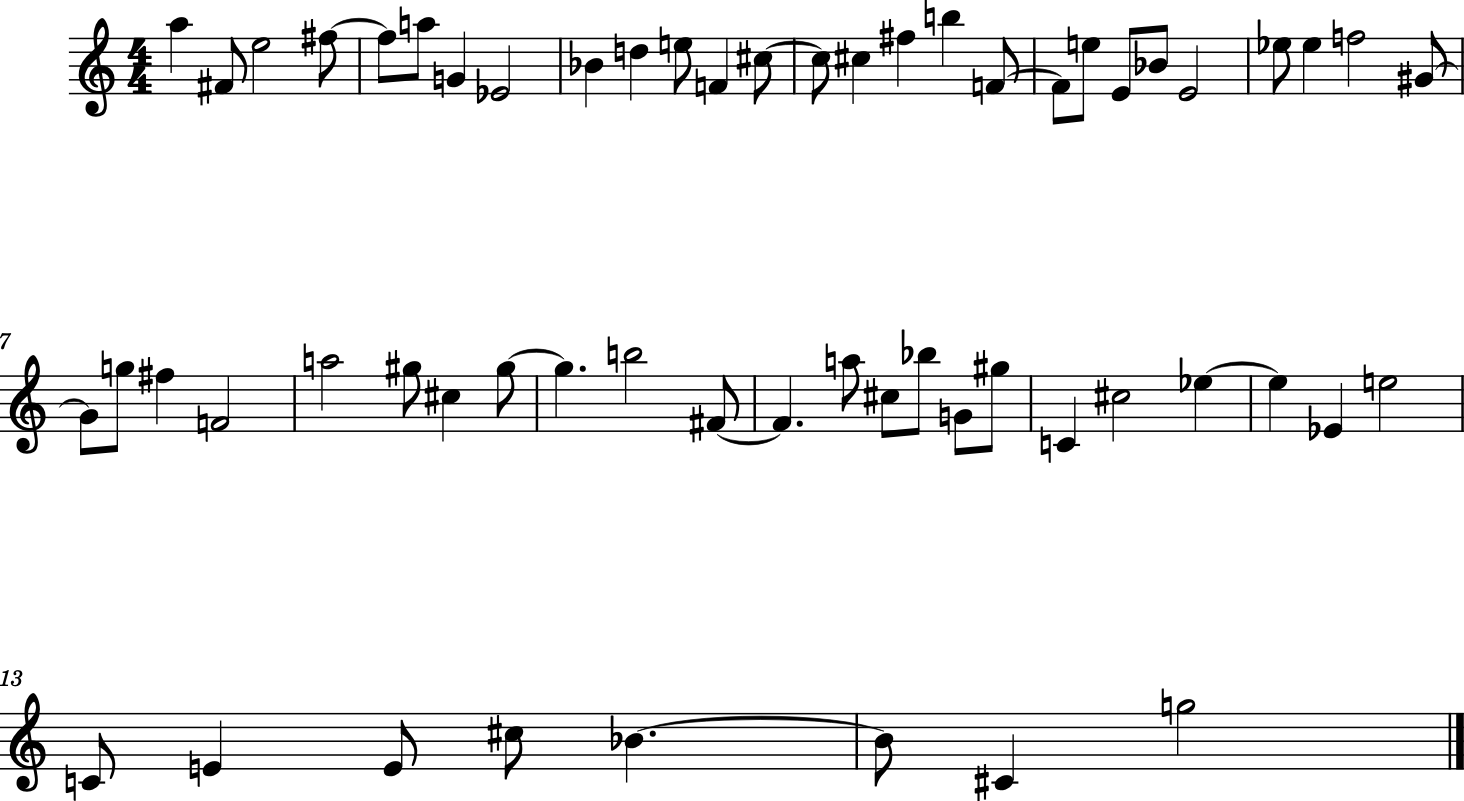

In [23]:
displayNotes([r],show='midi')

In [25]:
r0 = random_notes(range(0, 12), range(6, 7), [1/4, 1/8, 1/2], 50)
r1 = random_notes(range(0, 12), range(3, 5), [1/4, 1/8, 1/2], 50)

In [27]:
r = [r0,r1]

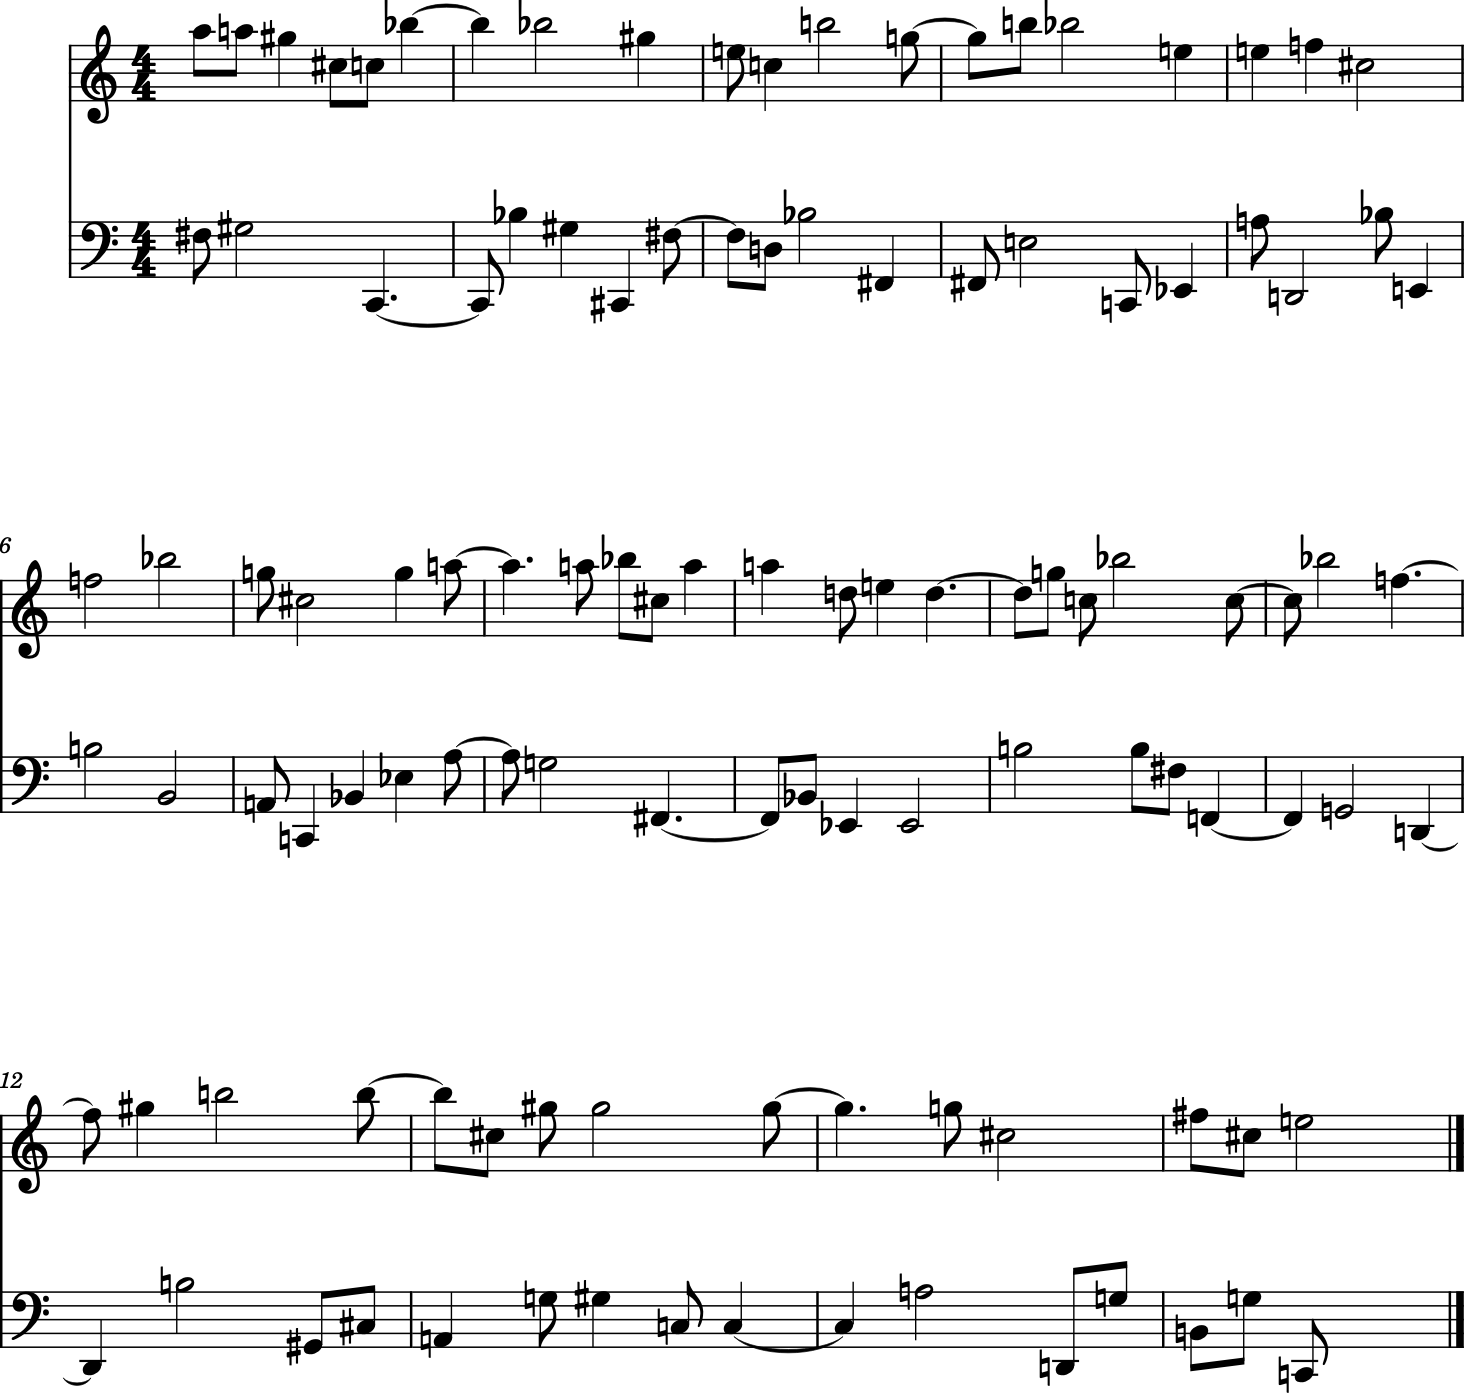

In [29]:
displayNotes(r,show='midi')

## Exercise 1
Generalize the above code so that one can have also rests with a given probability

## Exercise 2 
Compose a short (polyphonic) piece using combinations of different sequence generations and the mathematical operaration that we have defined previously. <p>
### Score analysis. 
See the following notebooks:
1. John Cage, "Music of Changes, Book I" - **See cage-IChing.ipynb notebook**
2. Pierre Boulez, "Structures I for two pianos" **See boulez-row.ipynb notebook**
3. Iannis Xenakis, "Concrete PH" - **See xena-pyo.ipynb notebook**

***

## Random walk

In [31]:
Length = 1000
Walk = [0]
for i in range(Length):
    if np.random.rand() <= 0.5:
        Walk.append(Walk[-1]-1)
    else:
        Walk.append(Walk[-1]+1)

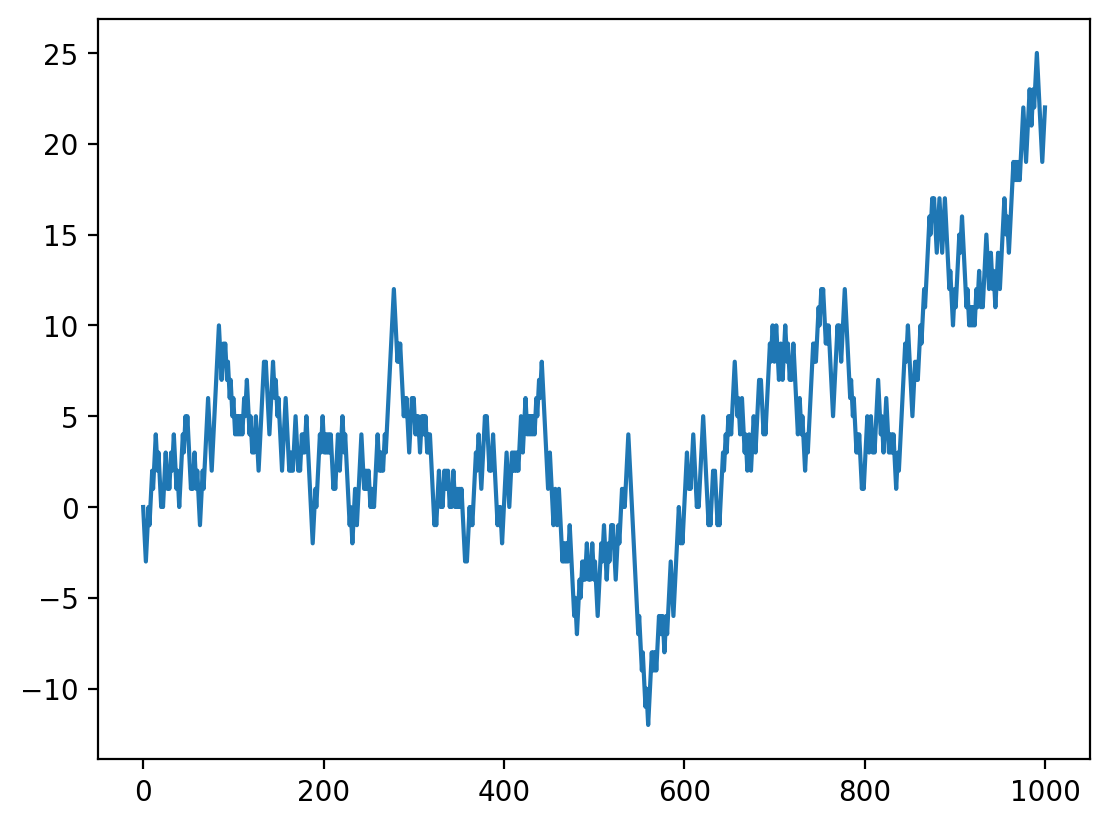

In [33]:
plt.plot(Walk)

In [35]:
Length = 100
Walk = [0]
notes = NoteSeq([Note(Walk[-1])])
for i in range(Length):
    if np.random.rand() <= 0.5:
        Walk.append(Walk[-1]-1)
    else:
        Walk.append(Walk[-1]+1)
    notes.append(Note(Walk[-1]))

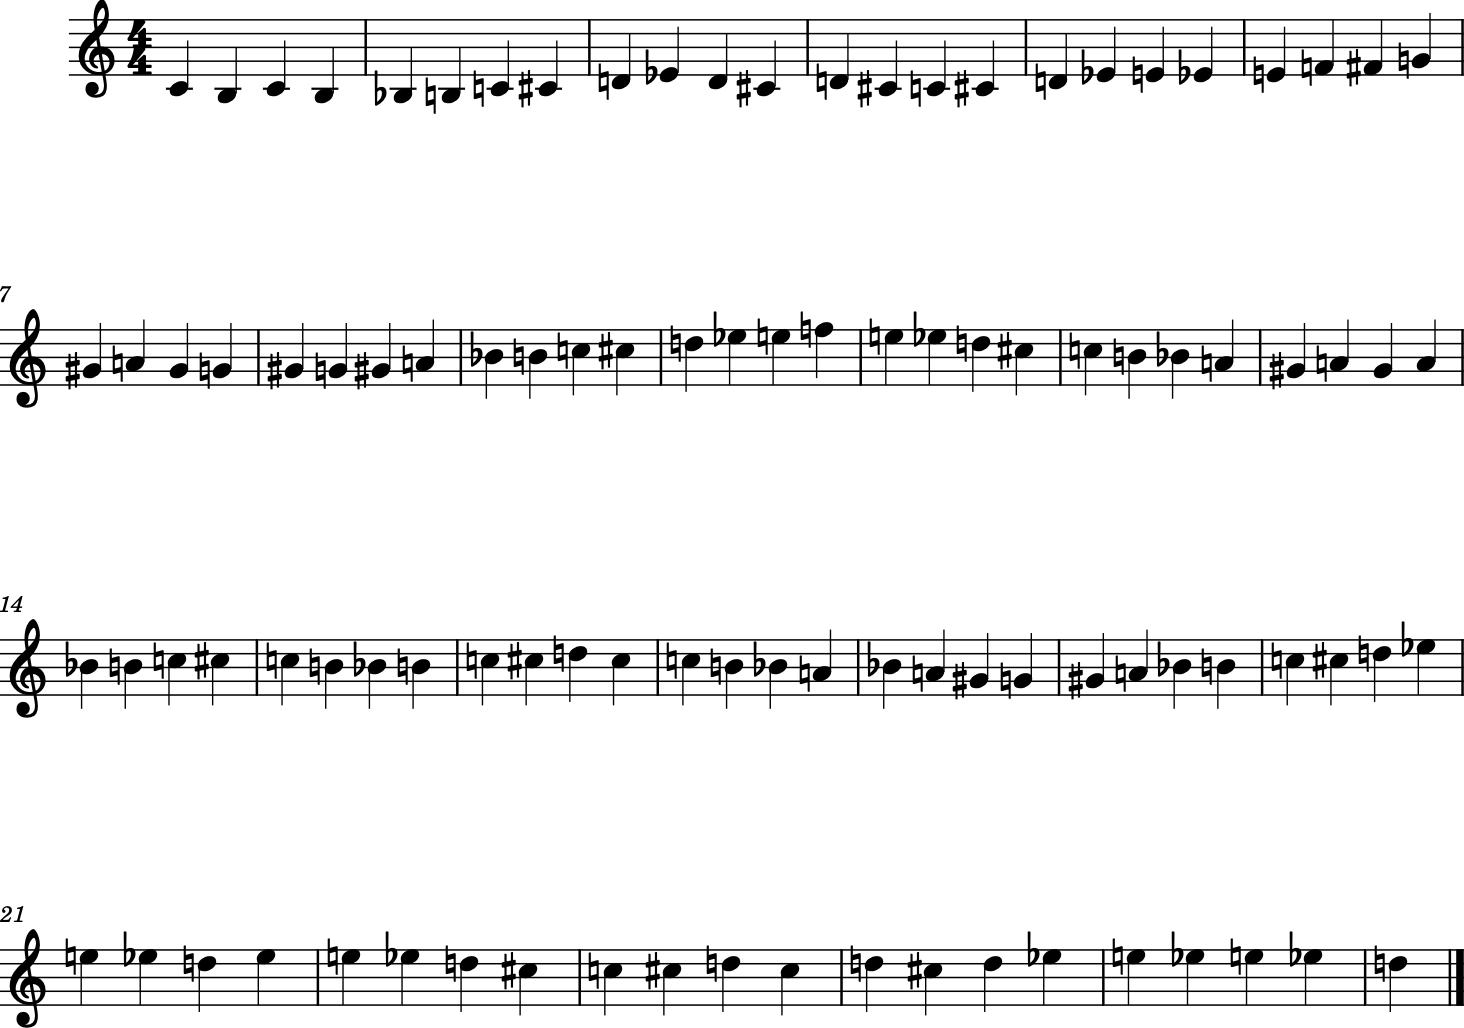

In [37]:
displayNotes([notes])

## Markov Chains

### simple coin toss

In [39]:
# let define heads = -1 and tail = 1
# The transition matrix is a 2x2 matrix of probabilities
T = np.array([[0.5,0.5],
              [0.5,0.5]])

In [41]:
ntoss = 100000
R = [-1]
for n in range(ntoss-1):
    R.append(np.random.choice([-1,1],p=T[R[-1]]))

In [43]:
print(sum(R))

-18


## Check
Check that by increasing the number of tosses the heads and tails count approaches the expected number of occurrences

## Exercise 4
Using the Markov chain above, reproduce the behavior of the simple random walk above

## Exercise 5
1. Implement a transition table for a *biased* coin toss (tails **always** produce heads, and heads **usually** produce heads)
2. Implement a transition table for a *persistent* coin toss (the current
outcome (heads or tails) tends to continue)

## Markov rhythms

In [45]:
# list of note durations to choose
dur = [1/4+1/8,1/4,1/8,1/16]

In [47]:
# Transition matrix
T = np.array([[0.0,0.0,0.7,0.3],      # a dotted quarter can be followed either by an eigth or a sixteenth
     [0.25,0.25,0.25,0.25],  # a quarter can be followed by any other duration with equal probability
     [0.2,0.3,0.4,0.1],      # etc.
     [0.0,0.2,0.2,0.6]])

In [49]:
nnotes = 100
R = [1]
rhythm = NoteSeq([Note(12,dur=dur[1])])
for n in range(nnotes-1):
    R.append(np.random.choice(len(dur),p=T[R[-1]]))
    rhythm.append(Note(12,dur=dur[R[-1]]))

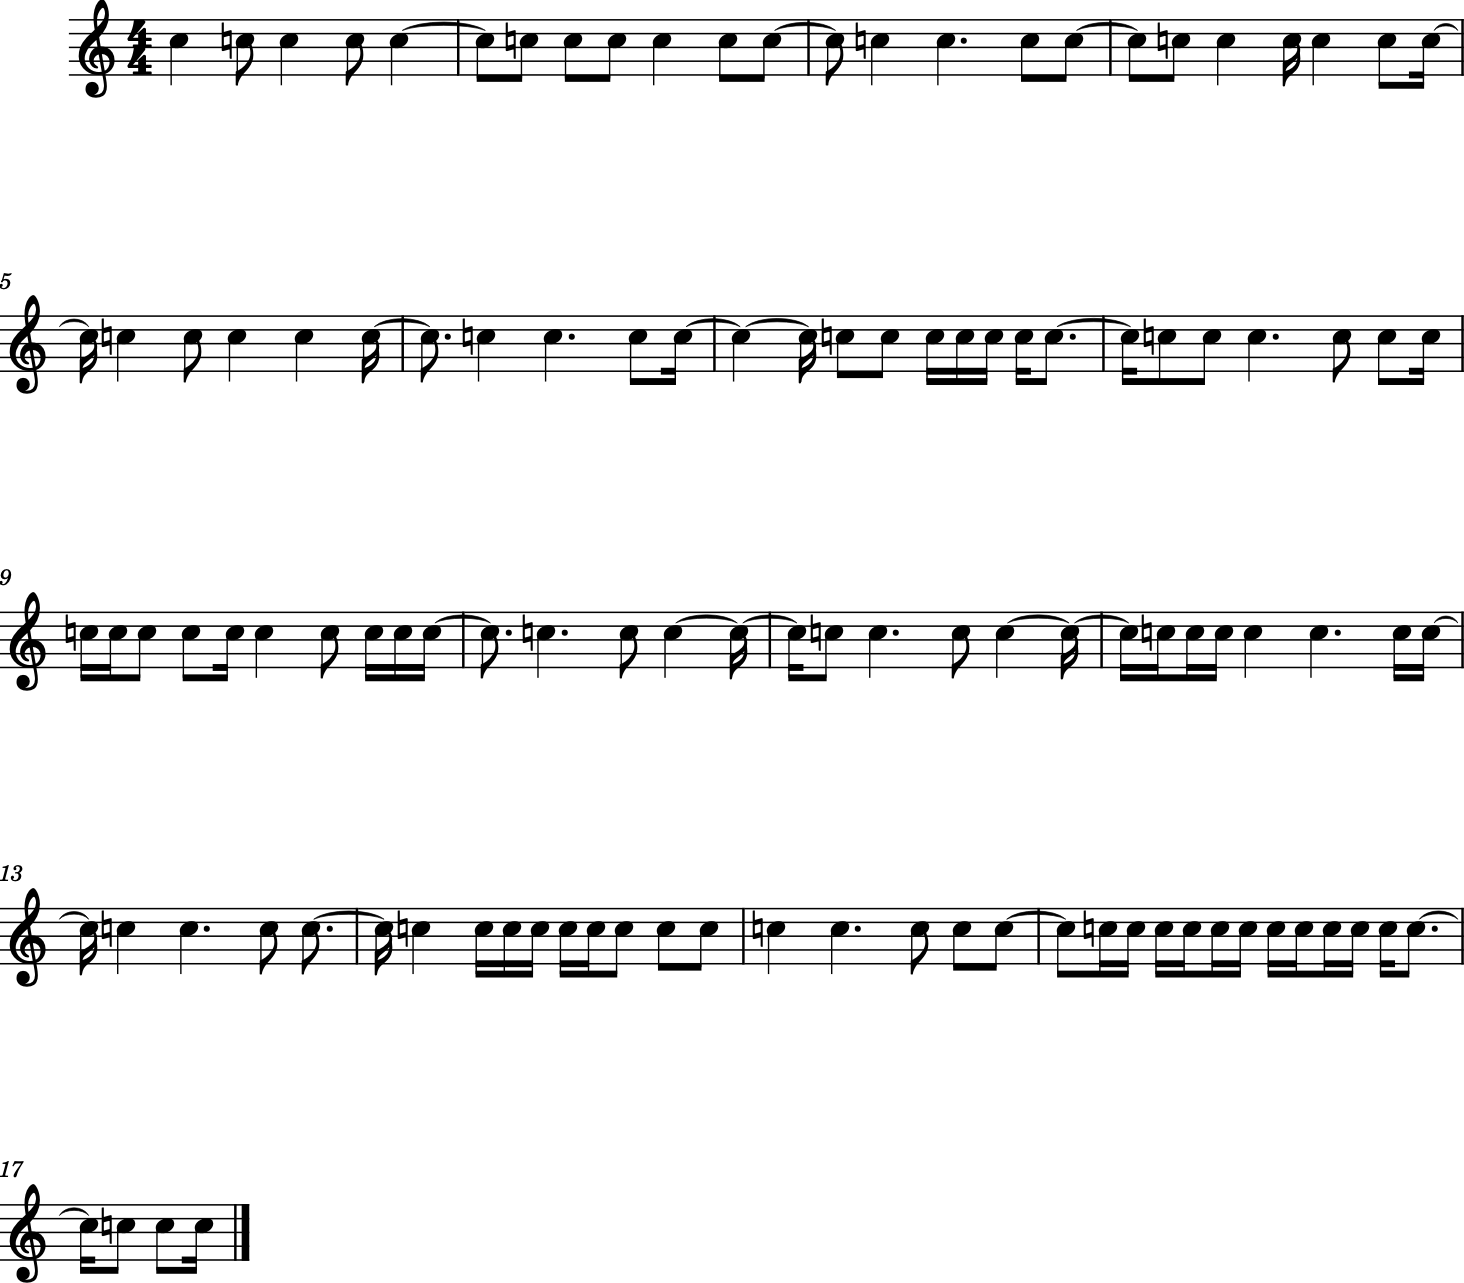

In [51]:
displayNotes([rhythm])

## Markov melody

Use a Markov process to generate a pseudo Gregorian Chant.

A Gregorian Chant is characterized by mostly step
wise motion within a range of modal degrees. From any given tone there is
more likelihood that a chant will move a step up or down than then to skip a
third or fourth away. The larger the skip, the more unlikely the chant is to make
it. Certain tones, such as the final and tenor, have more influence over the
melody than others. In the Dorian mode the tenor A is occasionally decorated
by the B-flat directly above it. This B-flat almost always returns back to the tenor
tone. In an authentic mode, the final of the mode acts as a kind of “reflecting
boundary” that redirects the melody in the opposite direction.

In [53]:
# Dorian mode
Dmode = ['D','E','F','G','A','Bb','C']

In [55]:
# Transition matrix
T = [[0.1,0.35,0.25,0.1,0.15,0.0,0.05], #D
     [0.35,0.1,0.35,0.1,0.1,0.0,0.0], #E
     [0.2,0.2,0.1,0.3,0.2,0.0,0.0], #F
     [0.1,0.1,0.3,0.1,0.4,0.0,0.0], #G
     [0.1,0.1,0.1,0.3,0.1,0.3,0.0], #A
     [0.0,0.0,0.0,0.0,1.0,0.0,0.0], #Bb
     [1.0,0.0,0.0,0.0,0.0,0.0,0.0]] #C

In [57]:
nnotes = 100
R = [0]
chant = NoteSeq([Note(Dmode[R[-1]])])
for n in range(nnotes-1):
    R.append(np.random.choice(len(Dmode),p=T[R[-1]]))
    chant.append(Note(Dmode[R[-1]]))

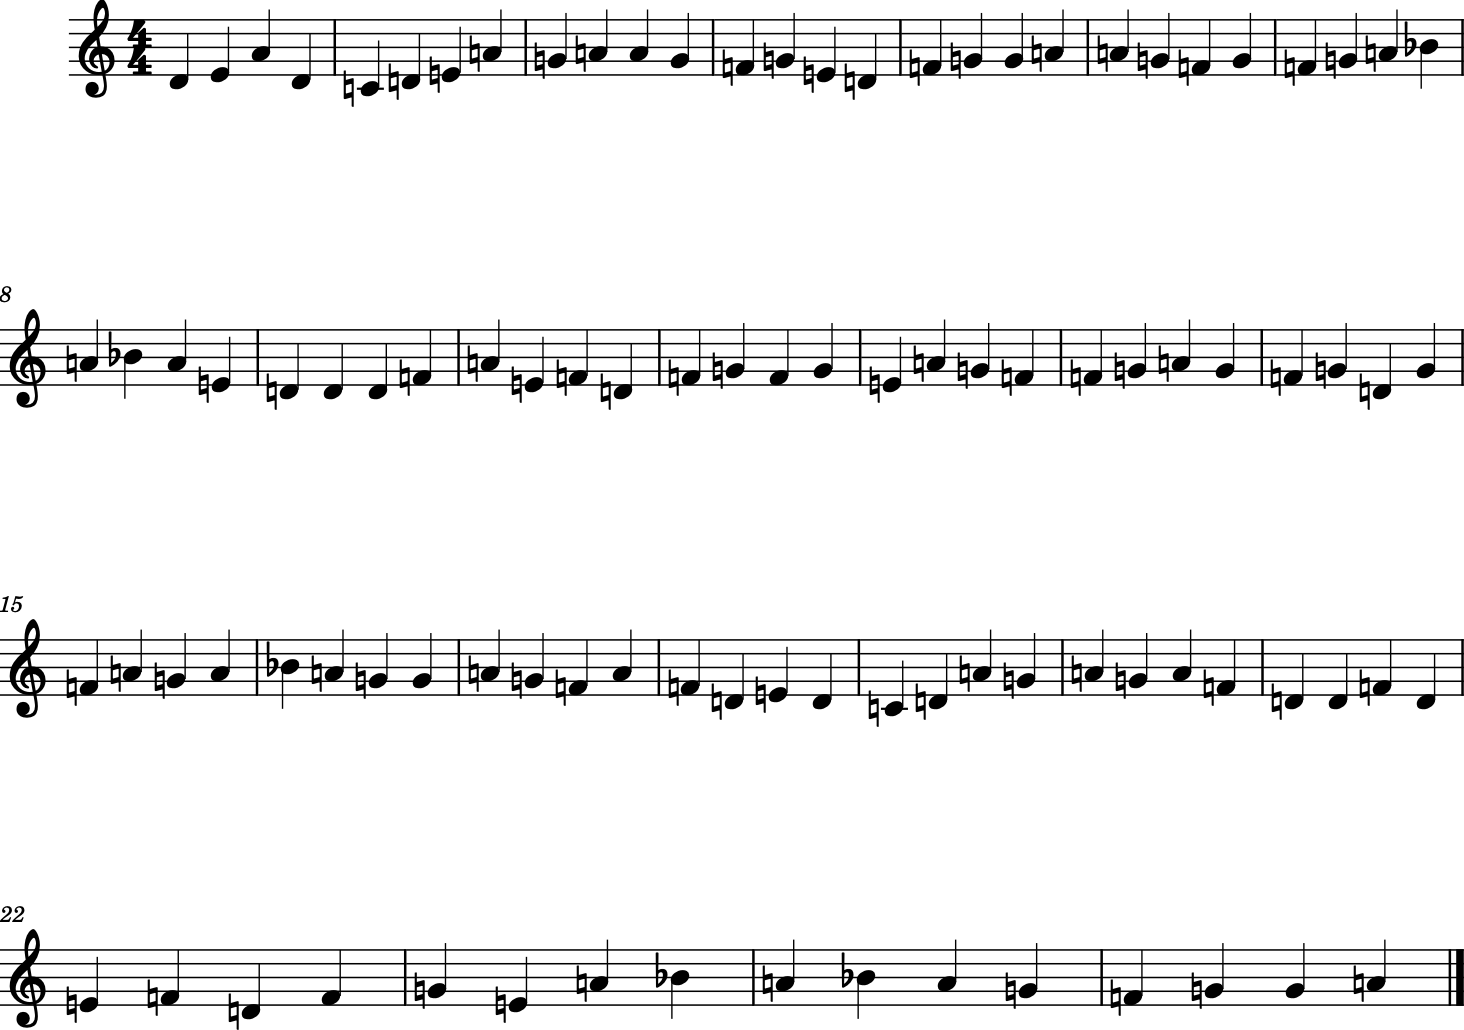

In [59]:
displayNotes([chant],show='midi')
